<a href="https://colab.research.google.com/github/harini9804/big-data-assignment/blob/master/Big_Data_Assignment_predictive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Analysis
After descriptive analysis, we shall proceed to using classification algorithms to predict the family of a plant.

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#----------#
# for prediction
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score, davies_bouldin_score

In [0]:
data = pd.read_csv('plants_data.csv')

From feature selection as part of descriptive analysis, we chose the following features for predictive techniques:

In [0]:
data.columns

Index(['Symbol', 'National Common Name', 'Author', 'Family'], dtype='object')

Plotting the number of plants in each category within 'Family' feature:

In [0]:
data["Symbol"].unique().shape

(6829,)

In [0]:
data["National Common Name"].unique().shape

(5348,)

In [0]:
data["Author"].unique().shape

(9465,)

In [0]:
data["Family"].unique().shape

(169,)

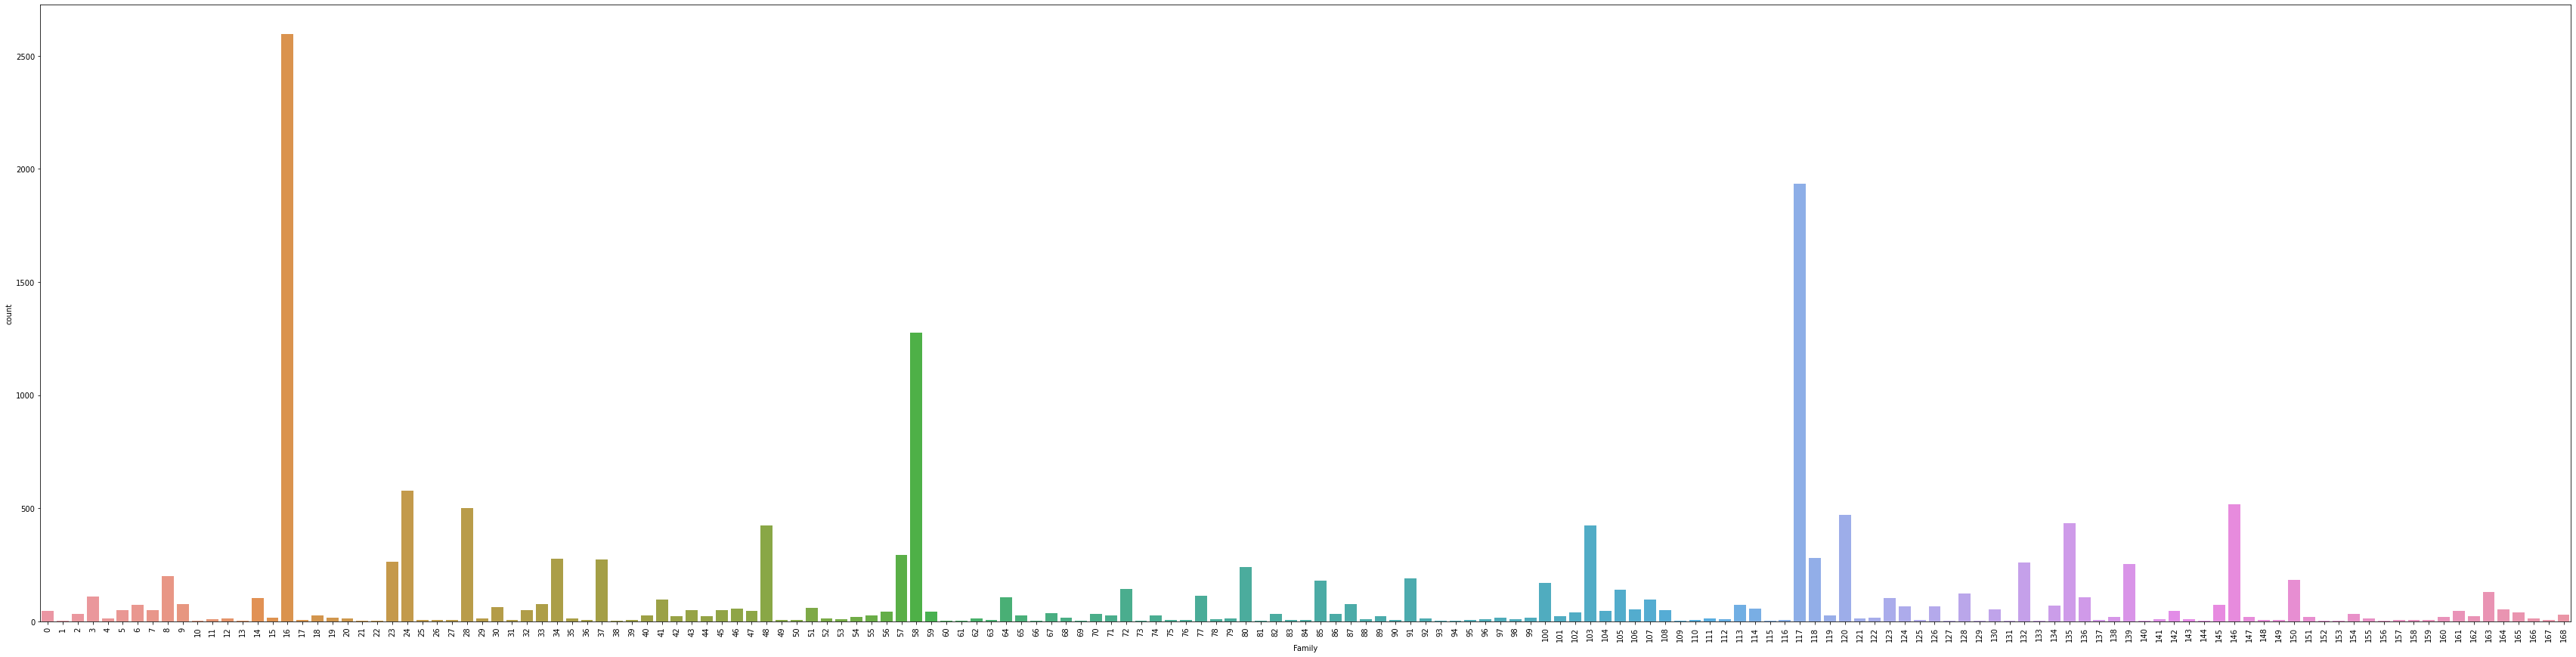

In [0]:
fig_dims = (60,15)

fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='Family', data=data, ax=ax)

plt.xticks(rotation = 90)

plt.show()

# Data Split
Now we split the data into the training and test set:

### Train - Test split
We keep 80% of total records in the train set and the remaining 20% in the test set.

In [0]:
x = data

In [0]:
train,test = train_test_split(x, random_state=40, test_size=0.2)

In [0]:
train_x = train.drop('Family', axis=1) 
train_y = train['Family']

In [0]:
test_x = test.drop('Family', axis=1) 
test_y = test['Family']

### Feature Scaling
**Standardization**: a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

**Normalization**: the process of scaling individual samples to have unit norm. 

In [0]:
Stdscalar = StandardScaler()

train_x_std = Stdscalar.fit_transform(train_x)
test_x_std = Stdscalar.fit_transform(test_x)

In [0]:
train_x_normalized = normalize(train_x_std) 
test_x_normalized = normalize(test_x_std)

### Classification and Clustering

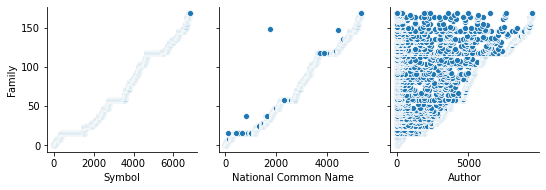

In [0]:
sns.pairplot(data, x_vars= ['Symbol', 'National Common Name', 'Author'], y_vars='Family')

Now we can plot pair wise plots, while marking different families in separate colors so as to observe if any trend is visible.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

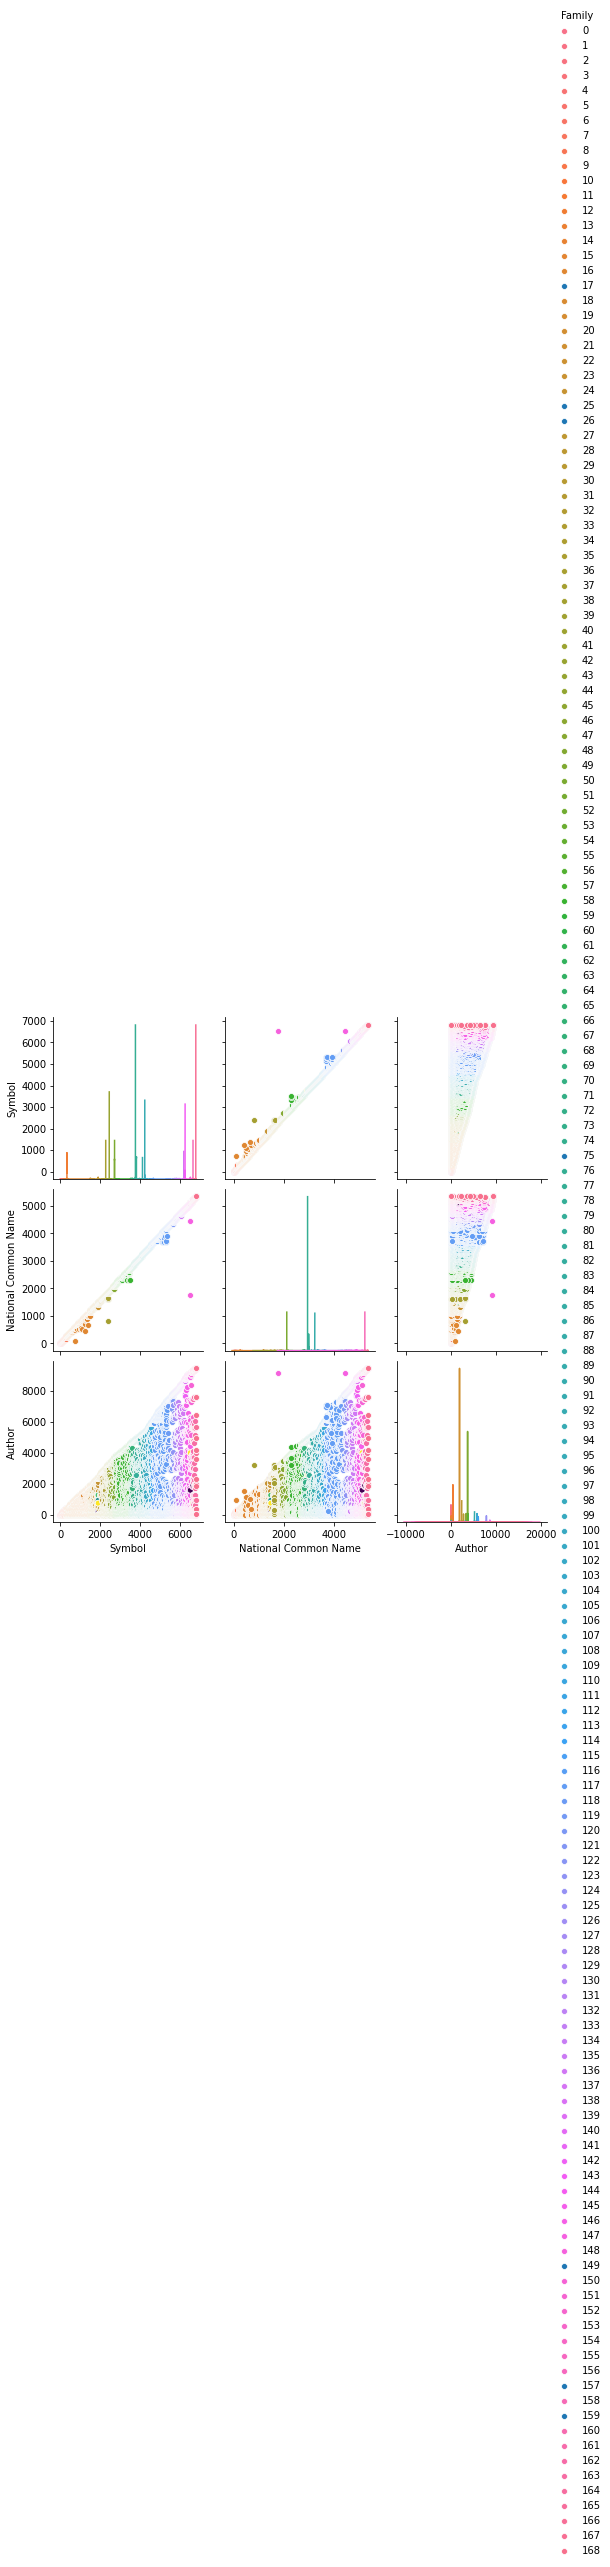

In [0]:
sns.pairplot(data, hue='Family')

In [0]:
# import warnings 

# warnings.filterwarnings('ignore')



#### Supervised - SVM
Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. SVM can be used for both regression and classification tasks.

We can use a multiclass SVM classifier on our dataset:

In [0]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_x_normalized, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
clf.score(test_x_normalized,test_y) 

0.45692541856925417

#### Unsupervised - DBSCAN
This algorithm defines clusters as continuous regions of high density.
If an instance has atleast *min_samples* instances in its *epsilon* neighbourhood, then it is considered a core instance.
All instances in the neighbourhood of a core instance belong to the same cluster.

In [0]:
# Compute DBSCAN
X = train_x_normalized
labels_true = train_y

db = DBSCAN(eps=0.003, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [0]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


In [0]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 238
Estimated number of noise points: 2039
Homogeneity: 0.392
Completeness: 0.553
V-measure: 0.459
Adjusted Rand Index: 0.199
Adjusted Mutual Information: 0.395
Silhouette Coefficient: -0.430


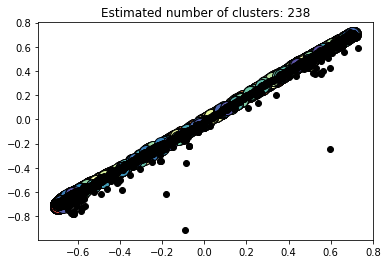

In [0]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

The silhouette value is a measure of how similar an object is to its own cluster. The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.


#### Hyperparameter tuning
Hyperparameters are used to control the learning process.
Hyperparameter tuning is used to find a tuple of parameters which lead to an optimal model.
Here, we shall tune the epsilon and min_samples parameter to obtain good scores - silhouette score and davies bouldin score.

***Silhouette Score*** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster.

***Davies Bouldin Score***, is the average similarity measure of each cluster with its most similar cluster. The minimum score is zero, with lower values indicating better clustering.

In [0]:
def unique(list1): 
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x)
    return unique_list

In [0]:
db_default = DBSCAN(eps = 0.008, min_samples = 5, metric='euclidean').fit(train_x_normalized) 
labels = db_default.labels_ 

print('Number of Clusters: {}'.format(len(unique(list(labels)))))
print('Silhouette Score: {}'.format(metrics.silhouette_score(train_x_normalized,labels)))
print('Davies Bouldin Score: {}'.format(metrics.davies_bouldin_score(train_x_normalized,labels)))

Number of Clusters: 47
Silhouette Score: -0.23798989505095075
Davies Bouldin Score: 1.3420623134326242


In [0]:
db_default = DBSCAN(eps = 0.009, min_samples = 5, metric='euclidean').fit(train_x_normalized) 
labels = db_default.labels_ 

print('Number of Clusters: {}'.format(len(unique(list(labels)))))
print('Silhouette Score: {}'.format(metrics.silhouette_score(train_x_normalized,labels)))
print('Davies Bouldin Score: {}'.format(metrics.davies_bouldin_score(train_x_normalized,labels)))

Number of Clusters: 39
Silhouette Score: -0.2308738730128645
Davies Bouldin Score: 1.2685312090254914


In [0]:
db_default = DBSCAN(eps = 0.012, min_samples = 4, metric='euclidean').fit(train_x_normalized) 
labels = db_default.labels_ 

print('Number of Clusters: {}'.format(len(unique(list(labels)))))
print('Silhouette Score: {}'.format(metrics.silhouette_score(train_x_normalized,labels)))
print('Davies Bouldin Score: {}'.format(metrics.davies_bouldin_score(train_x_normalized,labels)))

Number of Clusters: 21
Silhouette Score: -0.16920871670850315
Davies Bouldin Score: 1.2730814813624212


In [0]:
db_default = DBSCAN(eps = 0.1, min_samples = 4, metric='euclidean').fit(train_x_normalized) 
labels = db_default.labels_ 

print('Number of Clusters: {}'.format(len(unique(list(labels)))))
print('Silhouette Score: {}'.format(metrics.silhouette_score(train_x_normalized,labels)))
print('Davies Bouldin Score: {}'.format(metrics.davies_bouldin_score(train_x_normalized,labels)))

Number of Clusters: 2
Silhouette Score: 0.06908647100892752
Davies Bouldin Score: 1.6656053995356348


In [0]:
db_default = DBSCAN(eps = 0.004, min_samples = 4, metric='euclidean').fit(train_x_normalized) 
labels = db_default.labels_ 

print('Number of Clusters: {}'.format(len(unique(list(labels)))))
print('Silhouette Score: {}'.format(metrics.silhouette_score(train_x_normalized,labels)))
print('Davies Bouldin Score: {}'.format(metrics.davies_bouldin_score(train_x_normalized,labels)))

Number of Clusters: 243
Silhouette Score: -0.32017270421231425
Davies Bouldin Score: 1.1578929846046813


## Conclusion
The supervised and unsupervised algorithms do not seem to ably differentiate the classes in the 'Family' target variable.

A possible reason could be that large number of categories (169 classes) in 'Family' variable. The categories could be very similar to each other and a lack of a differentiating factor can be attributed to the poor classification performance.

## Itemset Mining

*Apriori* is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. 

In [0]:
import os, operator
from collections import defaultdict
from itertools import combinations, chain

In [0]:
import os, operator
from collections import defaultdict
from itertools import combinations, chain


class Apriori:
	"""
	Parameters
	----------
	minSupport: float
				Minimum support value for a transaction
				to be called interesting.
	minConfidence: float
				Minimum confidence for a rule to be called
				interesting.
	support_count: collection.defaultdict(int)
				Contains support count of itemsets.
				{
					frozenset(): int,
					frozenset(): int,
					frozenset(): int,
					...
				}
				frozenset(): set of items
				int: support count of the itemset
	"""

	def __init__(self, minSupport=0.02, minConfidence=0.45):
		self.support_count = defaultdict(int)
		self.minSupport = minSupport
		self.minConfidence = minConfidence


	def read_transactions_from_file(self, transaction_file):
		"""
		Parameters
		----------
		transaction_file: csv file
		Return Type
		-----------
		List of transactions as read from file.
		Each transaction is a set of items.
			[{a, b, c}, {b, d, p, q}, {p, e}, .....]
			{a, b, c} - 1st itemset (3-itemset)
			{b, d, p, q} - 2nd itemset (4-itemset)
			{p, e} - 3rd itemset (2-itemset)
			...
		"""
		with open (transaction_file, 'r') as infile:
			transactions = [set(line.rstrip('\n').split(',')) 
							for line in infile]
		
			return transactions


	def get_one_itemset(self, transactions):
		"""
		Parameters
		----------
		List of transactions. Each transaction 
		is a set of items.
			[{a, b, c}, {b, d, p, q}, {p, e}, .....]
		
			{a, b, c} - 1st itemset (3-itemset)
			{b, d, p, q} - 2nd itemset (4-itemset)
			{p, e} - 3rd itemset (2-itemset)
			...
		
		Return Type
		-----------
		one_itemset: set of unique items;
			{
				frozenset({'a'}), frozenset({'b'}), frozenset({'c'}), 
				frozenset({'d'}), frozenset({'e'}), frozenset({'p'}), 
				frozenset({'q'})
			}
		"""
		one_itemset = set()
		for transaction in transactions:
			for item in transaction:
				one_itemset.add(frozenset([item]))
		
		return one_itemset


	def self_cross(self, Ck, itemset_size):
		"""
		Parameters
		----------
		Ck: set
			a set of k-itemsets
			Size if each itemset in Ck is k(=itemset_size-1)
		itemset_size: int
			Required size of each itemset in resulting set(=k+1)
		Ck:
		{
			frozenset({'book', 'pen'}),
			frozenset({'book', 'dog'}),
			frozenset({'ox', 'coke'}),
			...
		} 
		for a 2-itemset
		
		Return Type
		-----------
		Ck_plus_1: set
			a set of (k+1)-itemsets
		
		Ck_plus_1:
		{
			frozenset({'book', 'pen', 'dog'}),
			frozenset({'book', 'dog', 'ox'}),
			frozenset({'book', 'coke', 'dog'}),
			...
		}
		"""
		Ck_plus_1 = {itemset1.union(itemset2) 
					for itemset1 in Ck for itemset2 in Ck 
					if len(itemset1.union(itemset2)) == itemset_size}
		return Ck_plus_1


	def prune_Ck(self, Ck, Lk_minus_1, itemset_size):
		"""
		Parameters
		----------
		Ck: set
			a set of k-itemsets(k=itemset_size)
		Lk_minus_1: set
			a set of (k-1)-itemsets
		itemset_size: int
			(= k)
		Ck:
		{
			frozenset({'book', 'dog', 'copper'}),
			frozenset({'book', 'dog', 'water'}),
		}
		Ck_minus_1:
		{
			frozenset({'book', 'dog'}),
			frozenset({'book', 'copper'}),
			frozenset({'dog', 'copper'})
			frozenset({'book', 'water'}),
			frozenset({'dog', 'water'}),
		}
		Lk_minus_1:
		{
			frozenset({'book', 'copper'}),
			frozenset({'book', 'dog'}),
			frozenset({'book', 'water'}),
			frozenset({'water', 'dog'})
		}
		Returns
		-------
		Ck_: set
			a set of k-itemsets
		Ck_: 
		{
			frozenset({'book', 'dog', 'water'})
		} those Ck's whose Ck_minus_1's are in Lk_minus_1
		
		"""
		Ck_ = set()
		for itemset in Ck:
			Ck_minus_1 = list(combinations(itemset, itemset_size-1))
			flag = 0
			for subset in Ck_minus_1:
				if not frozenset(subset) in Lk_minus_1:
					flag = 1
					break
			if flag == 0:
				Ck_.add(itemset)
		return Ck_


	def get_min_supp_itemsets(self, Ck, transactions):
		"""
		Parameters
		----------
		Ck: set
			a set of k-itemsets
		Transactions: list
			list of transactions. Each transaction is
			a set of items.
			[{a, b, c}, {b, d, p, q}, {p, e}, .....]
		Returns
		-------
		Lk: set
			a set of k-itemsets
			set of itemsets whose support is > minSupport
		"""
		temp_freq = defaultdict(int)
		
		# update support count of each itemset
		for transaction in transactions:
			for itemset in Ck:
				if itemset.issubset(transaction):
					temp_freq[itemset] += 1
					self.support_count[itemset] += 1

		N = len(transactions)
		Lk = [itemset for itemset, freq in temp_freq.items() 
					if freq/N > self.minSupport]
		return set(Lk)


	def apiori(self, transactions):
		"""
		Parameters
		----------
		transactions: list
			list of transactions. Each transaction is
				a set of items.
				[{a, b, c}, {b, d, p, q}, {p, e}, .....]
		Returns
		-------
		K_itemsets: dict
		{
			1: {frozenset({'dog'}), frozenset({'ox'}), ....}
			2: {frozenset({'dog', 'water'}), frozenset({'book', 'copper'}), .....}
			3: {frozenset({'dog', 'ox', 'gold'}), frozenset({'water', 'dog', ox}), ...}
		}
			key: value
			int: set of frozensets of size = value of key
			
			each itemset in K_itemset has support > minSupport
		"""
		K_itemsets = dict()
		Ck = self.get_one_itemset(transactions)
		Lk = self.get_min_supp_itemsets(Ck, transactions)
		k = 2
		while len(Lk) != 0:
			K_itemsets[k-1] = Lk
			Ck = self.self_cross(Lk, k)
			print(k, len(Ck))
			Ck = self.prune_Ck(Ck, Lk, k)
			print(k, len(Ck))
			Lk = self.get_min_supp_itemsets(Ck, transactions)
			print(k, len(Lk))
			k += 1

		return K_itemsets


	def subsets(self, iterable):
		"""
		Parameters
		----------
		iterable: an itearble container like set
		Returns
		-------
		subsets_: list powerset of elements in the iterable container
			[
				frozenset(),
				frozenset({a}), frozenset({b}),
				frozenset({a, b})  
			] if iterable is like {a, b}
		"""
		list_ = list(iterable)
		subsets_ = chain.from_iterable(combinations(list_, len) 
				for len in range(len(list_)+1))
		subsets_ = list(map(frozenset, subsets_))
		
		return subsets_


	def get_rules(self, K_itemsets):
		"""
		Parameters
		----------
		K_itemset: dict
			{key: value}
			{int: set of frozensets of size = value of key}
			
			each itemset in K_itemset has support > minSupport
		Returns
		-------
		rules: list of tuples
			Confidence of each returned rule is > minConfidence
		rule: left -> right
		tuple: (left, right, confidence of rule)
		"""
		rules = list()
		for key, k_itemset in K_itemsets.items():
			if key > 1:
				for itemset in k_itemset:
					sub_itemsets = \
					{subset for subset in self.subsets(itemset) 
						if (subset != set() and len(subset) != len(itemset))}
					for subset in sub_itemsets:
						left = subset
						right = itemset.difference(subset)
						confidence = self.support_count[itemset]/self.support_count[left]
						if (confidence > self.minConfidence):
							rules.append((list(left), list(right), confidence))

		rules.sort(key=operator.itemgetter(2), reverse=True)
		return rules


	def write_info(self, K_itemsets, rules, transactions_count):
		"""
		Writes the rules and frequent itemsets with their 
		support and confidence to a file.
		"""
		N = transactions_count
		main_dir = './results/'
		if not os.path.exists(main_dir):
			os.makedirs(main_dir)

		outfile_path = './results/s='+str(self.minSupport)+' c='+str(self.minConfidence)
		with open (outfile_path, 'w') as outfile:
			outfile.write('Frequent Itemsets:')
			tot_itemset_count = 0
			for key, values in K_itemsets.items():
				outfile.write('\n'+str(key)+'-itemsets:\n')
				count = 0
				for value in values:
					support = self.support_count[value]/N
					support_ct = self.support_count[value]
					count += 1
					tot_itemset_count += 1
					outfile.write(str(list(value))+' | support: '+str(support_ct)+'\n')
				outfile.write('Count: '+str(count)+'\n\n')

			outfile.write('Total number of frequent itemset(s): '+str(tot_itemset_count)+'\n')
			outfile.write('\n\nRules:\n')

			for rule in rules:
				support_l = self.support_count[frozenset(rule[0])]
				support_r = self.support_count[frozenset(rule[1])]
				outfile.write(str(rule[0])+'('+str(support_l)+')'+' -> '+str(rule[1])+ \
							'('+str(support_r)+')'+' | confidence: '+str(rule[2])+'\n')
			outfile.write('\nTotal number of rules: '+str(len(rules))+'\n')


Applying association rule mining on plants dataset which we have processed so far --

The following params were set after **hyperparameter tuning**:


Min Support 0.007
Min Confidence 0.001.

In [0]:
in_transaction_file = '/content/plants_data.csv'

minSupport=0.007
minConfidence=0.001
ap = Apriori(minSupport,minConfidence)
transactions = ap.read_transactions_from_file(in_transaction_file)
K_itemsets = ap.apiori(transactions)
rules = ap.get_rules(K_itemsets)
ap.write_info(K_itemsets, rules, len(transactions))

cwd = os.getcwd()
dirname = os.path.dirname(cwd+'/results/s='+str(minSupport)+' c='+str(minConfidence))
if not os.path.exists(dirname):
    os.makedirs(dirname)

f=open(cwd+'/results/s='+str(minSupport)+' c='+str(minConfidence), "r")
contents = f.read()
print(contents)

2 741
2 741
2 1
3 0
3 0
3 0
Frequent Itemsets:
1-itemsets:
['72'] | support: 145
['23'] | support: 267
['139'] | support: 262
['163'] | support: 132
['387'] | support: 254
['64'] | support: 127
['28'] | support: 510
['193'] | support: 196
['132'] | support: 266
['40'] | support: 228
['91'] | support: 195
['31'] | support: 391
['3'] | support: 143
['58'] | support: 1292
['48'] | support: 431
['100'] | support: 175
['117'] | support: 1940
['120'] | support: 477
['135'] | support: 439
['80'] | support: 253
['51'] | support: 579
['16'] | support: 2685
['146'] | support: 551
['77'] | support: 117
['37'] | support: 277
['103'] | support: 430
['128'] | support: 140
['68'] | support: 142
['34'] | support: 280
['2'] | support: 550
['150'] | support: 191
['24'] | support: 583
['105'] | support: 146
['8'] | support: 204
['57'] | support: 297
['1'] | support: 130
['118'] | support: 288
['85'] | support: 188
['46'] | support: 124
Count: 39


2-itemsets:
['16', '2'] | support: 179
Count: 1

Total nu

We see that with given params of support and confidence, two rules have been generated.


---



##CFI
It is a frequent itemset that is both closed and its support is greater than or equal to min support. An itemset is closed in a data set if there exists no superset that has the same support count as this original itemset.

Here we shall use CHARM algorithm:

In [0]:
import os
import time
import argparse
from copy import copy
import pandas as pd



class DataPreparation:
    transactional = []
    tid_count = 0

    def import_data(self, filename):
        with open(filename, 'r') as file:
            tid = 1
            for line in file:
                line = line.strip().split()
                for element in line:
                    self.transactional.append({'tid': tid, 'item': element})
                tid += 1
        self.tid_count = tid - 1

    def transform_data(self):
        df = pd.DataFrame(self.transactional)
        self.itemsGrouped = df.groupby(['item'])['tid'].apply(list)
        self.itemsGrouped = pd.DataFrame({'item': self.itemsGrouped.index, 'tid': self.itemsGrouped.values})
        self.itemsGrouped['item'] = self.itemsGrouped['item'].apply(lambda x: {x})

    def get_frequent_items(self, min_sup):
        return self.itemsGrouped[self.itemsGrouped['tid'].map(len) >= min_sup * self.tid_count]


class CharmAlgorithm:
    def __init__(self, min_sup_config, tid_count):
        self.result = pd.DataFrame(columns=['item', 'tid', 'support'])
        self.min_sup = min_sup_config * tid_count

    @staticmethod
    def replace_values(df, column, find, replace):
        for row in df.itertuples():
            if find <= row[column]:
                row[column].update(replace)

    def charm_property(self, row1, row2, items, new_item, new_tid):
        if len(new_tid) >= self.min_sup:
            if set(row1[2]) == set(row2[2]):
                # remove row2[1] from items
                items = items[items['item'] != row2[1]]
                # replace all row1[1] with new_item
                find = copy(row1[1])
                self.replace_values(items, 1, find, new_item)
                self.replace_values(self.items_tmp, 1, find, new_item)
            elif set(row1[2]).issubset(set(row2[2])):
                # replace all row1[1] with new_item
                find = copy(row1[1])
                self.replace_values(items, 1, find, new_item)
                self.replace_values(self.items_tmp, 1, find, new_item)
            elif set(row2[2]).issubset(set(row1[2])):
                # remove row2[1] from items
                items = items[items['item'] != row2[1]]
                # add {item, tid} to self.items_tmp
                self.items_tmp = self.items_tmp.append({'item': new_item, 'tid': new_tid}, ignore_index=True)
                # sort items by ascending support
                # s = self.items_tmp.tid.str.len().sort_values().index
                # self.items_tmp = self.items_tmp.reindex(s).reset_index(drop=True)
            elif set(row1[2]) != set(row2[2]):
                # add {item, tid} to self.items_tmp
                self.items_tmp = self.items_tmp.append({'item': new_item, 'tid': new_tid}, ignore_index=True)
                # sort items by ascending support
                # s = self.items_tmp.tid.str.len().sort_values().index
                # self.items_tmp = self.items_tmp.reindex(s).reset_index(drop=True)

    def charm_extend(self, items_grouped):
        # sort items by ascending support
        s = items_grouped.tid.str.len().sort_values().index
        items_grouped = items_grouped.reindex(s).reset_index(drop=True)

        for row1 in items_grouped.itertuples():
            self.items_tmp = pd.DataFrame(columns=['item', 'tid'])
            for row2 in items_grouped.itertuples():
                if row2[0] >= row1[0]:
                    item = set()
                    item.update(row1[1])
                    item.update(row2[1])
                    tid = list(set(row1[2]) & set(row2[2]))
                    self.charm_property(row1, row2, items_grouped, item, tid)
            if not self.items_tmp.empty:
                self.charm_extend(self.items_tmp)
            # check if item subsumed
            is_subsumption = False
            for row in self.result.itertuples():
                if row1[1].issubset(row[1]) and set(row[2]) == set(row1[2]):
                    is_subsumption = True
                    break
            # append to result if element not subsumed
            if not is_subsumption:
                self.result = self.result.append({'item': row1[1], 'tid': row1[2], 'support': len(row1[2])}, ignore_index=True)

    def write_result_to_file(self, result_file):
        self.result.to_csv(result_file, sep='\t', columns=['item', 'support'], index=False)
        type(self.result)
    

In [0]:
# Variables:

input_filname='/content/plants_data.csv'
support = 0.0005
output_filename = 'charm_plants_output'

# Data preparation:
data = DataPreparation()
data.import_data(input_filname)
data.transform_data()
freq = data.get_frequent_items(support)

# Algorithm:

algorithm = CharmAlgorithm(support, data.tid_count)
algorithm.charm_extend(freq)


# write to file
algorithm.write_result_to_file(output_filename)

cwd = os.getcwd()
dirname = os.path.dirname(cwd+'/'+output_filename)
if not os.path.exists(dirname):
    os.makedirs(dirname)

f=open(cwd+'/'+output_filename, "r")
contents = f.read()
print(contents)

item	support
{'6386,4992,31,146'}	10



## MAFIA

In [0]:
import numpy as np
from functools import lru_cache

class TransVerticalBitmaps:
	""" 
	Parameters
	----------
	transactions : list of sets
		The list of transactions
	Attributes
	----------
	transactions : list of sets
		The list of transactions
	n_transactions : int
		The number of transactions
	items : list
		The list of all items in sorted order
	items_vertical_bitmaps : dict
		The dictionary of vertical bitmap representation of transactions indexed by item
	"""

	def __init__(self, transactions):

		self.transactions = transactions
		self.n_transactions = len(self.transactions)

		# Extract the list of items in the transactions
		items = set()
		for transaction in self.transactions:
			items.update(transaction)
		self.items = sorted(items)

		self.items_vertical_bitmaps = {item:np.zeros(shape=(self.n_transactions,), dtype=np.bool) for item in self.items}

		for i_transaction, transaction in enumerate(self.transactions):
			for item in transaction:
				self.items_vertical_bitmaps[item][i_transaction] = True


	@lru_cache(maxsize=32)
	def compVerticalBitmap(self, itemset):
		""" Compute the vertical bitmap of the given itemset
		
		Parameters
		----------
		itemset : tuple
			The tuple of items (or itemset) for which support is to be counted
		Returns
		-------
		np.array(bool)
			Vertical bitmap of transactions in the which itemset is present
		"""
		
		if len(itemset) == 1:
			item = itemset[0]
			return self.items_vertical_bitmaps[item]

		else:
			last_item = itemset[-1]
			return self.compVerticalBitmap(itemset[:-1])&self.items_vertical_bitmaps[last_item]


	def countSupport(self, itemset):
		""" Count the support of the itemset in the transactions 
		Parameters
		----------
		itemset : tuple
			The tuple of items for which support is to be counted
		Returns
		-------
		int
			The support count of the itemset in the transactions
		"""
		
		itemset_vertical_bitmap = self.compVerticalBitmap(itemset)
		itemset_support_count = np.count_nonzero(itemset_vertical_bitmap)

		return itemset_support_count



class MafiaNode:
	""" A node in the MAFIA candidate itemset tree 
	
	Parameters
	----------
	head : set
		The set of all items in head of the node
	tail : tuple
		The tuple of all items in tail of the node
	support_count : int optional(default=None)
		The support count of head of the node
	Attributes
	----------
	head : set
		The set of all items in head of the node
	tail : tuple
		The tuple of all items in tail of the node
	support_count : int
		The support count of head of the node
	Notes
	-----
		The :attr:`head` is of type tuple as opposed to set or list since it is passed to :meth:`compVerticalBitmap`
		of :class:`transactions` that caches results and therefore requires the inputs to **hashable**.
	"""

	def __init__(self, head, tail, support_count=None):
		self.head = head
		self.tail = tail.copy()
		self.support_count = support_count


def _mafiaAlgorithm(current_node, MFIs, transactions, min_support_count):

	# HUTMFI Pruning - Prune the subtree, if the HUT of the node has any superset in MFI
	head_union_tail = current_node.head + tuple(current_node.tail)
	if any(all(item in mfi for item in head_union_tail) for mfi in MFIs):
		return

	# Count the support of all children of the node
	node_children_support_cnts = [( item ,transactions.countSupport(current_node.head + (item,)) ) for item in current_node.tail]
	# Extract the frequent children of the node and their support counts
	node_freq_children_sup_cnts = [(item, support_count) for item, support_count in node_children_support_cnts if support_count >= min_support_count]

	node_children_items_parent_eq = [] # The items in tail with same support as parent
	node_tail_items_sup_cnts	= [] # The items in node's tail (except parent equivalence items) sorted by desc support

	for item, support_count in node_freq_children_sup_cnts:
		if support_count == current_node.support_count:
			node_children_items_parent_eq.append(item)
		else:
			node_tail_items_sup_cnts.append((item, support_count))

	# Sort the items in the trimmed tail by increasing support
	node_tail_items_sup_cnts.sort(key=lambda x:x[1])
	node_tail_items = [item for item, support in node_tail_items_sup_cnts]

	current_node.head += tuple(node_children_items_parent_eq)
	current_node.tail = node_tail_items

	is_leaf = not bool(current_node.tail)

	for i, item in enumerate(current_node.tail):
		new_node_head = current_node.head + (item,)
		new_node_tail = current_node.tail[i+1:]
		new_node_support_cnt = node_tail_items_sup_cnts[i][1]
		new_node = MafiaNode(new_node_head, new_node_tail, new_node_support_cnt)

		is_hut = (i == 0) # if i is the first element in the tail
		_mafiaAlgorithm(new_node, MFIs, transactions, min_support_count)

	# if current node is a leaf and no superset of current node head in MFIs
	if is_leaf and current_node.head and not any(all(item in mfi for item in current_node.head) for mfi in MFIs):
		MFIs.append(set(current_node.head))


def mafiaAlgorithm(transactions, min_support_count):
	""" Extract the MFIs (Maximal Frequent Itemsets) from transactions with min support count using MAFIA Algorithm
	Parameters
	----------
	transactions : list of sets
		The list of transactions
	min_support_count : int
		The minimum support count threshold
	Returns
	-------
	list of sets
		The list of all maximal frequent itemsets
	"""

	transactions_vertical_bitmaps = TransVerticalBitmaps(transactions)
	MFIs = []

	# Create the root node of MAFIA candidate itemset tree
	mafia_cand_itemset_root = MafiaNode(tuple(), transactions_vertical_bitmaps.items, transactions_vertical_bitmaps.n_transactions)

	# Perform the MAFIA algorithm
	_mafiaAlgorithm(mafia_cand_itemset_root, MFIs, transactions_vertical_bitmaps, min_support_count)
	return MFIs


In [0]:

min_support_count = 3

MFIs = mafiaAlgorithm(transactions, min_support_count)

# Print the list of all maximal frequent itemsets (MFIs)
print("Maximal Frequent Itemsets (MFIs)")
for mfi in MFIs:
  print(mfi)

Streaming output truncated to the last 5000 lines.
{'296'}
{'2964'}
{'2969'}
{'2973'}
{'2974'}
{'2975'}
{'2976'}
{'2984'}
{'2985'}
{'2990'}
{'2994'}
{'2997'}
{'3002'}
{'3012'}
{'3014'}
{'3022'}
{'3025'}
{'3032'}
{'3033'}
{'3042'}
{'3046'}
{'3049'}
{'3051'}
{'3054'}
{'3059'}
{'3064'}
{'3070'}
{'3071'}
{'3079'}
{'3089'}
{'3094'}
{'3095'}
{'3100'}
{'3102'}
{'3105'}
{'311'}
{'3110'}
{'3111'}
{'3116'}
{'3122'}
{'3128'}
{'3129'}
{'3132'}
{'3134'}
{'3138'}
{'314'}
{'3143'}
{'3146'}
{'3147'}
{'3156'}
{'3157'}
{'3164'}
{'3167'}
{'3169'}
{'317'}
{'3175'}
{'3179'}
{'3187'}
{'3188'}
{'3197'}
{'3199'}
{'3201'}
{'3206'}
{'3210'}
{'3218'}
{'3220'}
{'3223'}
{'3228'}
{'3232'}
{'3235'}
{'3246'}
{'3249'}
{'325'}
{'3250'}
{'3253'}
{'3254'}
{'3255'}
{'3272'}
{'3276'}
{'3277'}
{'328'}
{'3280'}
{'3282'}
{'3283'}
{'3285'}
{'3287'}
{'3320'}
{'3332'}
{'3333'}
{'334'}
{'3340'}
{'3341'}
{'3342'}
{'3351'}
{'3355'}
{'3358'}
{'3362'}
{'3366'}
{'3369'}
{'337'}
{'3373'}
{'3375'}
{'3385'}
{'3393'}
{'3405'}
{'3420'}
{'3